## Measure the similarity between images by calculating their histograms

In [533]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from utils.min_val_dict import min_val_dict
from visualize.display import display_similar_images

A histogram is a very important tool in Image processing. It is a graphical representation of the distribution of data. An image histogram gives a graphical representation of the distribution of pixel intensities in a digital image.

The x-axis indicates the range of values the variable can take. This range can be divided into a series of intervals called bins. 

The y-axis shows the count of how many values fall within that interval or bin.
When plotting the histogram we have the pixel intensity in the X-axis and the frequency in the Y-axis. As any other histogram we can decide how many bins to use.

A histogram can be calculated both for the gray-scale image and for the colored image.
In the first case we have a single channel, hence a single histogram. In the second case we have 3 channels, hence 3 histograms.

Calculating the histogram of an image is very useful as it gives an intuition regarding some properties of the image such as the tonal range, the contrast and the brightness.

* To identify the dominant colors in an image, we can use the histogram plot of the Hue channel.

In [294]:
# Importing image
rgb_image = plt.imread('images/puppy.jpg')

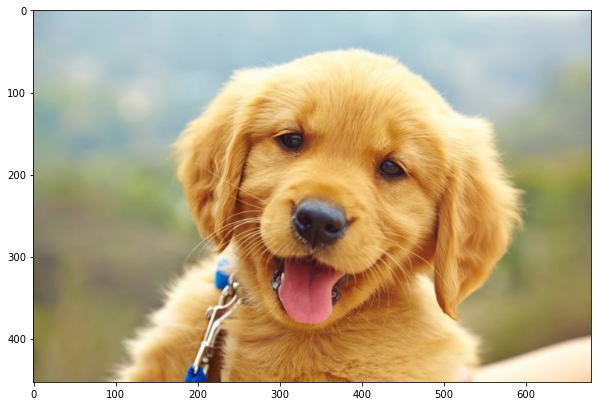

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.show()

In [10]:
# Shape of the image
rgb_image.shape

(453, 680, 3)

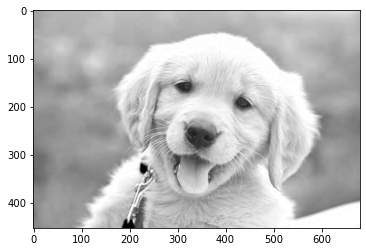

In [27]:
red_channel = rgb_image[:,:,0]
plt.imshow(red_channel, cmap='gray')
plt.show()
# more white more red, more black less red

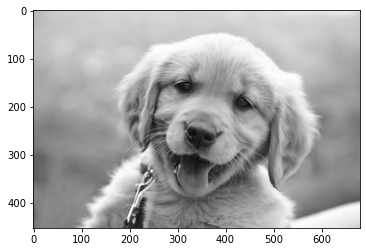

In [26]:
green_channel = rgb_image[:,:,1]
plt.imshow(green_channel, cmap='gray')
plt.show()
# more white more green, more black less green

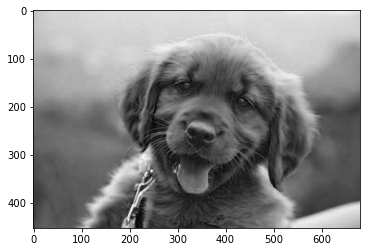

In [25]:
blue_channel = rgb_image[:,:,2]
plt.imshow(blue_channel, cmap='gray')
plt.show()
# more white more blue, more black less blue

## Plot them together

In [56]:
from visualize

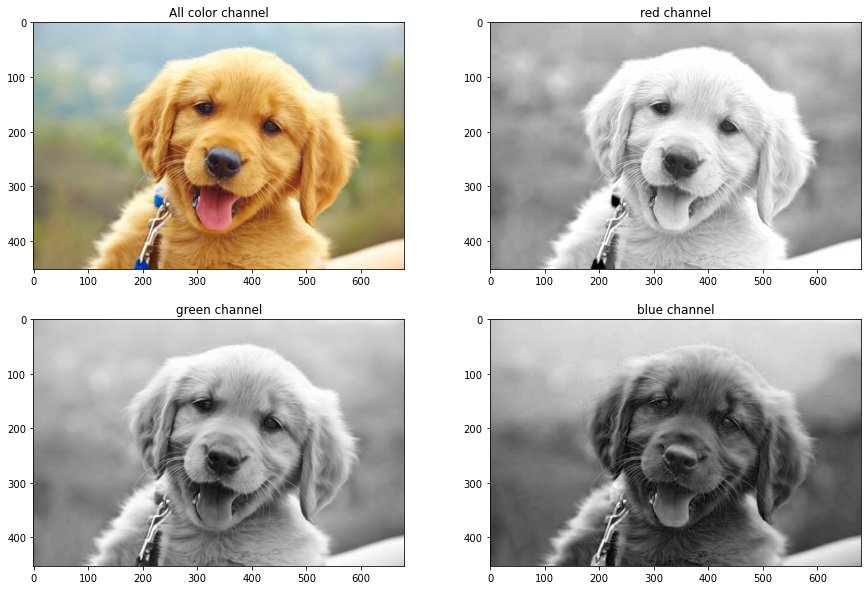

In [57]:
show_different_color_channel('images/puppy.jpg')

In [542]:
from histogram.calculate_histogram import calculate_histogram

In [543]:
hist = calculate_histogram(rgb_image, [0])

In [443]:
def plot_histograms_together(img):
    """
    plot three histogram at the same figure of the three color channel.
    :param img: an image or path of image.
    """
    colors = ['red', 'green', 'blue']
    channel = ' channel'
    color_channel = [color + channel for color in colors]
    
    if isinstance(img, str) or isinstance(img, np.ndarray):
        # Create a figure
        fig = plt.figure(figsize=(15, 10))
        
        # img as string (path or image).
        if isinstance(img, str):
            img = plt.imread(img)

        # rgb image as ndarray
        if img.ndim == 3 and img.shape[2] == 3:
            # Compute the histogram of first color channel (red color channel)
            hist_gs_red = calcul_of_histogram(img, [0])
            hist_green = calcul_of_histogram(img, [1])
            hist_blue = calcul_of_histogram(img, [2])
            
            # add grid of figures
            ax = fig.add_subplot(2, 2, 1)
            
            # show differents hists at the same first grid figure
            plt.plot(hist_gs_red, color='r')
            plt.plot(hist_green, color='g')
            plt.plot(hist_blue, color='b')
            plt.title('All color channels')
            
            # iterate over histogram for different color channel
            for i, color in enumerate(colors):
                ax = fig.add_subplot(2, 2, i + 2)
                hist = calcul_of_histogram(img, [i])
                plt.plot(hist, color=colors[i][0])
                plt.title(color_channel[i])
        
        # gray-scale image
        if img.ndim == 2:
            hist_gs = calcul_of_histogram(img, [0])
            plt.plot(hist_gs, color='k')
            plt.title('gray-scale image')
        
    else:
        raise Exception('ValueError: image parameter expect path of image as string or a numpy.ndarray')

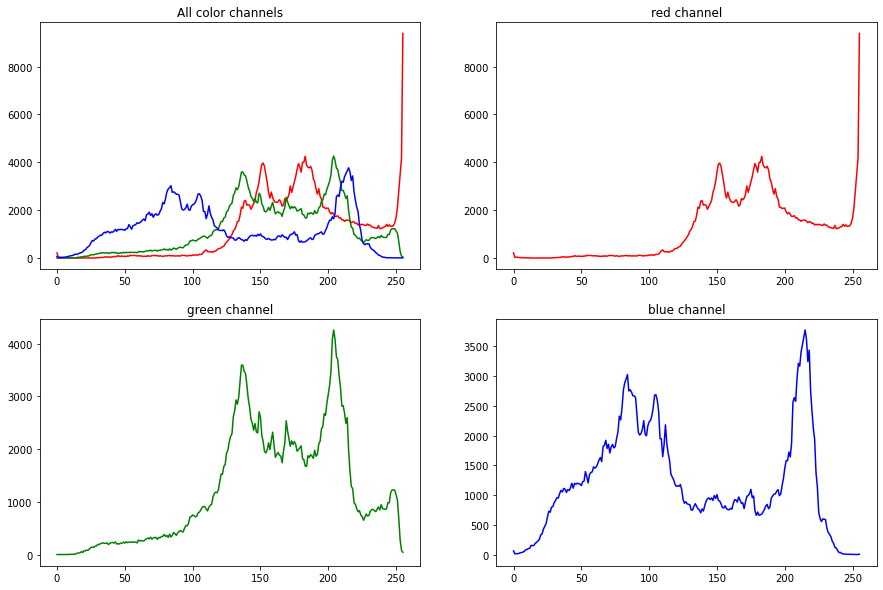

In [444]:
plot_histograms_together(rgb_image)

# Comapre two images using histogram

In [ ]:
from utils.tr_color_2_gr_scale import tr_2_gr_scale

In [485]:
def compare_img_hist(img_1, img_2):
    """
    Campare two RGB images using histogram.
    :param img_1: array-like image.
    :param img_2: array-liek image.
    :return integer 
        difference between histogram
    """
    
    # We will do that just for gray-scale images to make things easier
    # converting images to gray-scale
    img_1 = tr_2_gr_scale(img_1)
    img_2 = tr_2_gr_scale(img_2)
    
    # Calculating histograms
    hist_img_1 = calcul_of_histogram(img_1, [0])
    hist_img_2 = calcul_of_histogram(img_2, [0])
    
    return np.sum(np.abs(hist_img_1 - hist_img_2))


In [488]:
# load imagres
img_1 = plt.imread('images/image1_.jpg')
img_2 = plt.imread('images/image2_.jpg')

In [489]:
hist_diff = compare_img_hist(img_1, img_2)

In [490]:
hist_diff

848

## Search for n similar images by minimizing the difference between their histograms

In [534]:
def search_n_similar_images_by_hist(images, image, n):
    """
    Find similar images of the given one by minimizing the difference of their histogram.

    :param images: array_like
        array of images
    :param image: array_like
        An image to search for its similar
    :param n: integer
        number of first similar to yield.
    :return:
        Tuple
        A tuple of containing similar images of image given as argument and their histogram difference value.
    """

    # Holds the current iteration value.
    iteration = 0

    # dictionary will hold difference values.
    dic_values = {}

    # holds array of similar images
    similar_images = []

    # store the difference between the two images.
    for img in images:
        # compute the histogram of the current image and the given image.
        hist_diff_val = compare_img_hist(img, image)

#         # avoid storing the spearman correlation value with its duplicate image.
#         if hist_diff_val > 0.0:
#             # dictionary stores the spearman value with its index.
        dic_values[iteration] = hist_diff_val
        iteration += 1

    # look for n similar images
    dict_n_imgs = {}
    dump_iter = n

    while dump_iter > 0 and len(dic_values) != 0:
        # key with maximum value
        key_min_value = min_val_dict(dic_values)

        dict_n_imgs[key_min_value] = dic_values[key_min_value]
        dic_values.pop(key_min_value)
        dump_iter -= 1

    # Stores the histogram difference values of n most similar images with the input image as a list
    hist__n_values = list(dict_n_imgs.values())

    # The indices of similar images.
    n_keys_similar_images = list(dict_n_imgs.keys())

    # corresponding images
    for key in n_keys_similar_images:
        similar_images.append(images[key])

    return similar_images, hist__n_values

## Getting data ready

In [535]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [538]:
# Takes incredible amount of time to finish. So grap a cup of tea and wait.
a, b = search_n_similar_images_by_hist(X_train, X_train[0], 12)

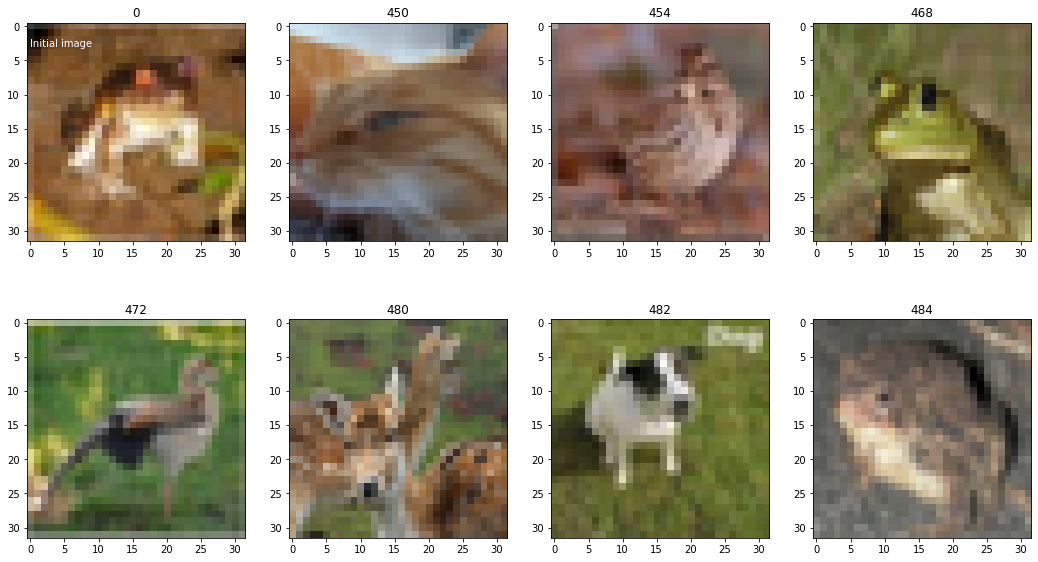

In [541]:
display_similar_images(a, b, 8)

##### As we can see these images are similar